<a href="https://colab.research.google.com/github/BachokunIAR/Battery/blob/main/Battery_data_AnalysisAB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<font color = green> Important Libraries

In [1]:
import pandas as pd
import numpy as np
import os, chardet, glob
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import files

#<font color = green> Loading the dataset into colab

In [2]:
file = files.upload()

Saving 00001.csv to 00001.csv


In [3]:
!ls

00001.csv  sample_data


In [4]:
bat_data = pd.read_csv("00001.csv")
bat_data.head()

,Voltage_measured,Current_measured,Temperature_measured,Current_load,Voltage_load,Time
0,4.246711,0.000252,6.212696,0.0002,0.000,0.000
1,4.246764,-0.001411,6.234019,0.0002,4.262,9.360
2,4.039277,-0.995093,6.250255,1.0000,3.465,23.281
3,4.019506,-0.996731,6.302176,1.0000,3.451,36.406
4,4.004763,-0.992845,6.361645,1.0000,3.438,49.625


In [14]:
# checkin the length of rows and columns
bat_data.shape

(490, 6)

# <font color = green> Information about the Dataset

In [15]:
bat_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 490 entries, 0 to 489
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Voltage_measured      490 non-null    float64
 1   Current_measured      490 non-null    float64
 2   Temperature_measured  490 non-null    float64
 3   Current_load          490 non-null    float64
 4   Voltage_load          490 non-null    float64
 5   Time                  490 non-null    float64
dtypes: float64(6)
memory usage: 23.1 KB


In [12]:
# Checking to see if there is any NAN values
bat_data.isna().sum()

Voltage_measured        0
Current_measured        0
Temperature_measured    0
Current_load            0
Voltage_load            0
Time                    0
dtype: int64

In [13]:
bat_data.describe()

,Voltage_measured,Current_measured,Temperature_measured,Current_load,Voltage_load,Time
count,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000
mean,3.475266,-0.952767,8.272423,0.957153,2.817939,3205.134141
std,0.284626,0.201448,1.455269,0.202690,0.644985,1861.395346
min,2.470612,-1.001101,5.008084,0.000200,0.000000,0.000000
25%,3.336993,-0.995898,7.313213,1.000000,2.790500,1598.417750
50%,3.491946,-0.995207,8.184590,1.000000,2.945500,3200.492500
75%,3.655987,-0.994648,9.025544,1.000000,3.105750,4809.176250
max,4.246764,0.000252,12.376816,1.000000,4.262000,6436.141000


#<font color = green> Making histographs for the data

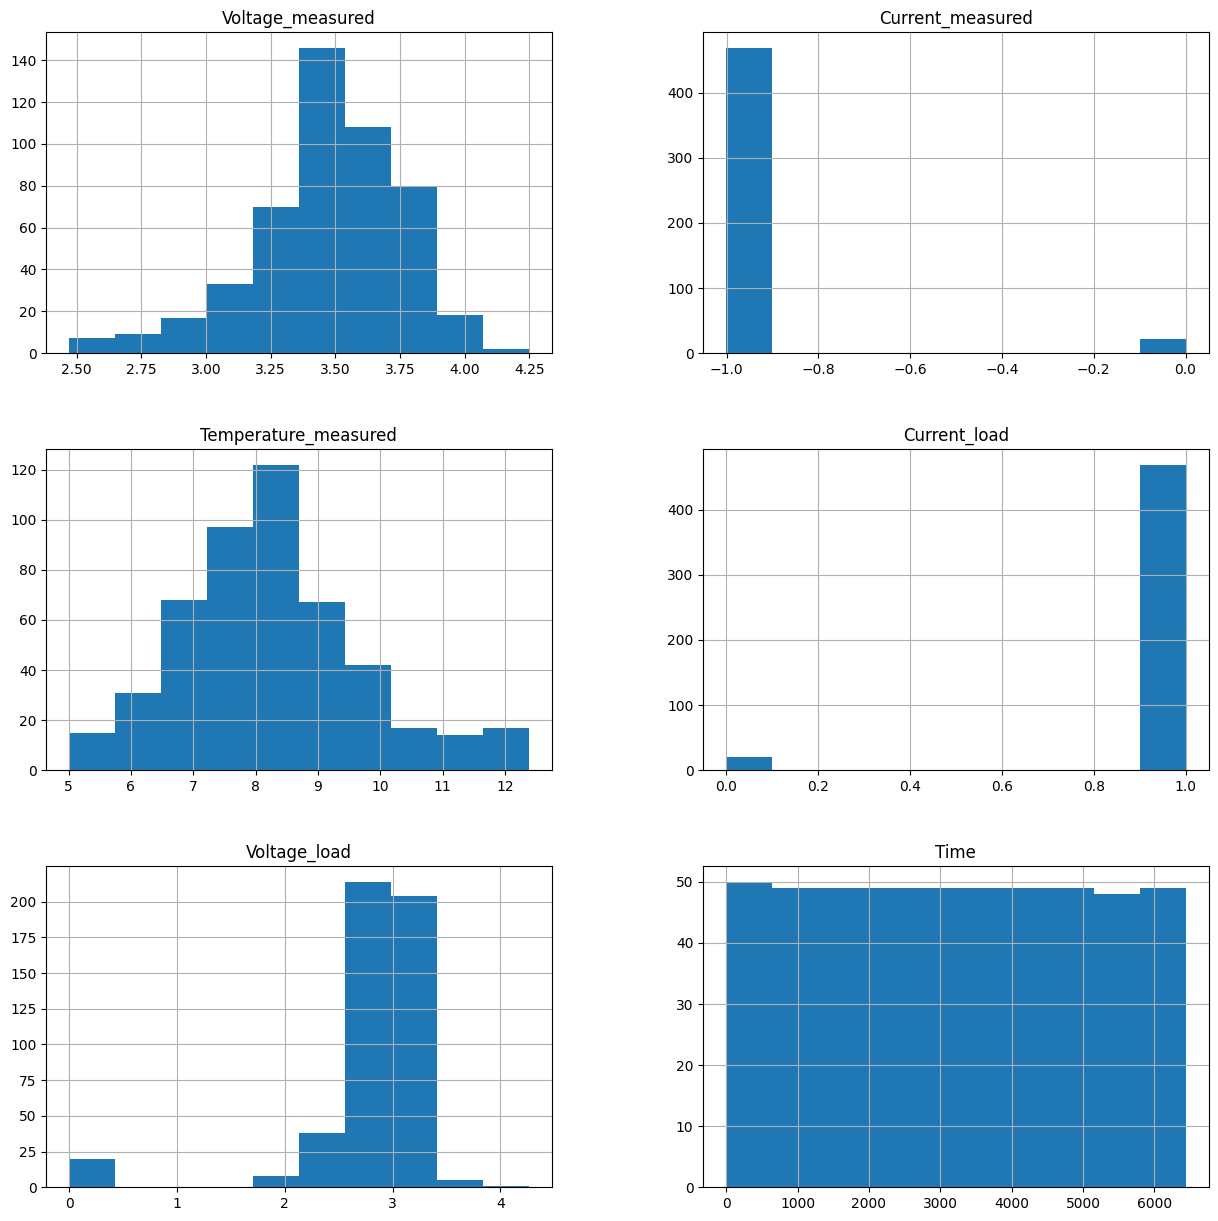

In [17]:
plt.rcParams["figure.figsize"]=[15,15]
bat_data.hist();

#<font color= green> Correlation between the feauteures of the Battery

In [18]:
bat_data.corr()

,Voltage_measured,Current_measured,Temperature_measured,Current_load,Voltage_load,Time
Voltage_measured,1.000000,-0.115334,-0.850956,0.115594,0.550305,-0.928945
Current_measured,-0.115334,1.000000,0.313445,-0.999988,-0.858674,0.285117
Temperature_measured,-0.850956,0.313445,1.000000,-0.313668,-0.640534,0.820165
Current_load,0.115594,-0.999988,-0.313668,1.000000,0.858785,-0.285432
Voltage_load,0.550305,-0.858674,-0.640534,0.858785,1.000000,-0.657162
Time,-0.928945,0.285117,0.820165,-0.285432,-0.657162,1.000000


#<font color =green> Analysing the data

In [26]:

def plot_test_bat_data(bat_data, profile="charge"):

    if profile=='charge':
        plt.figure(figsize=(10,4))
        plt.plot(bat_data.Time, bat_data.Voltage_measured, 'b', label='Voltage_measured')
        plt.plot(bat_data.Time, bat_data.Voltage_load, 'r', label='Voltage_load')
        plt.title("Plot of Test time vrs. Voltage_measured and Voltage_load")
        plt.xlabel("Test time(s)")
        plt.ylabel("voltage(V)")
        plt.title("Plot of bat_data")
        plt.legend()
        plt.show()
       # ploting the data for the test_time vs. Current
        plt.figure(figsize=(10,4))
        plt.plot(bat_data.Time, bat_data.Current_measured, 'b', label='Current_measured')
        plt.plot(bat_data.Time, bat_data.Current_load, 'r', label='Current_load')
        plt.title("Plot of Test time vrs. Current_measured and Current_load")
        plt.xlabel("Test time(s)")
        plt.ylabel("Curent(A)")
        plt.legend()
        plt.show()
       # ploting the data for the test_time vs. measured temperature
        plt.figure(figsize=(10,4))
        plt.plot(bat_data.Time, bat_data.Temperature_measured, 'k', label='Temperature_measured')
        plt.ylabel("Temperature_measured")
        plt.xlabel("Test time(s)")
        plt.legend()
        plt.show()



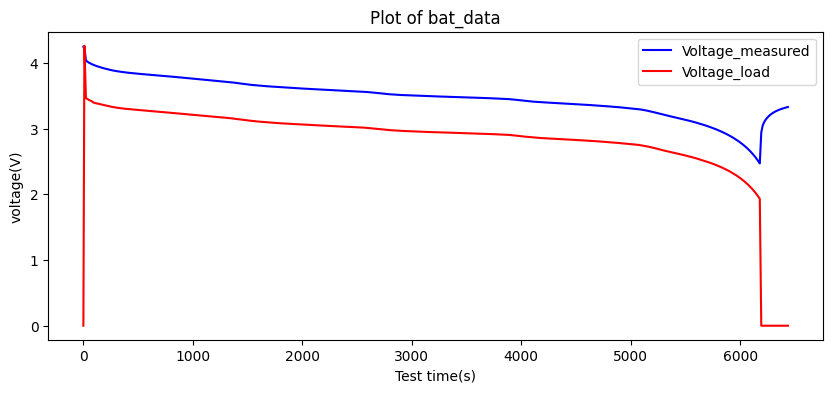

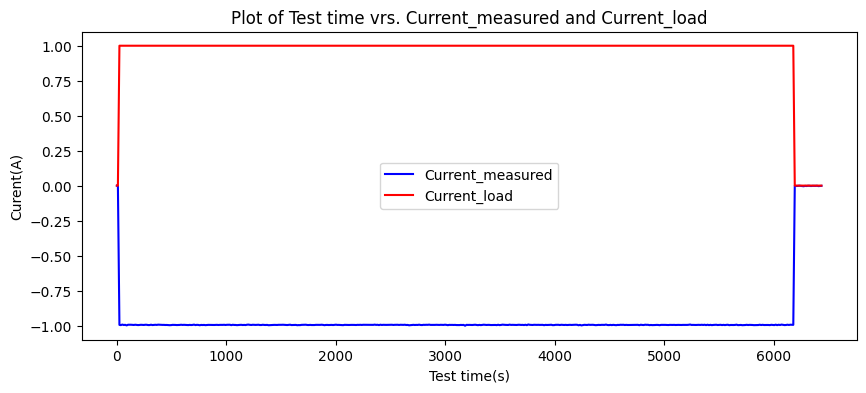

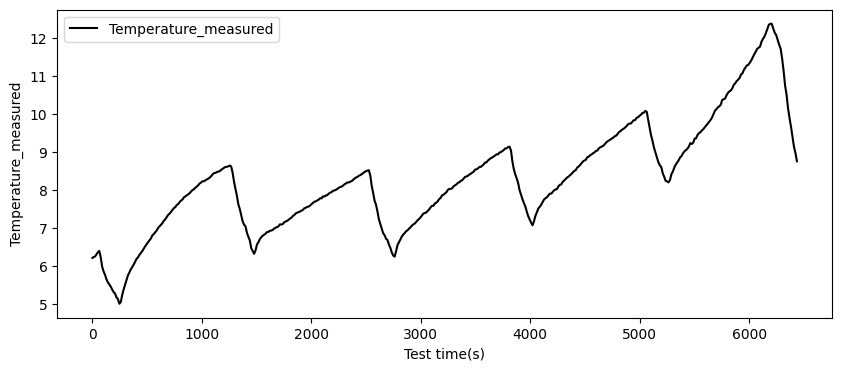

In [27]:
plot_test_bat_data(bat_data)